In [2]:

import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

rdir="results/"

datasets = ["medicare"]

results = []
curves = []
for part in ("train", "test"):
    for dset in datasets:
        dirs =  [d for d in os.listdir(f"../{rdir}/{dset}") if not d.startswith(".")]

        for dir in dirs:
            runs = [d for d in os.listdir(f"../{rdir}/{dset}/{dir}") if not d.startswith(".")] 
            for seed in runs:
                try:
                    exp_dir = f"../{rdir}/{dset}/{dir}/{seed}"
                    with open(f"{exp_dir}/metrics_{part}.yaml", 'r') as io:
                        metrics = yaml.safe_load(io)

                    with open(f"{exp_dir}/config.yaml", 'r') as io:
                        cfg = yaml.safe_load(io)
                    metrics['seed'] = int(seed)
                    metrics['dataset'] = dset
                    metrics['dir'] = dir
                    metrics["part"] = part
                    results.append(metrics)

                    curve = pd.read_csv(f"{exp_dir}/curve.csv")
                    curve['seed'] = int(seed)
                    curve['dir'] = dir
                    curve['dataset'] = dset
                    curve["part"] = part
                    curves.append(curve)
                except:
                    pass

results = pd.DataFrame(results)
curves = pd.concat(curves)

pd.set_option('display.max_colwidth', -1)
results.groupby(['part', 'dataset', 'dir']).mean().reset_index()

/tmp/ipykernel_136669/3585163325.py:39: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,part,dataset,dir,best_iter,best_val,gps_ratio_loss,last_saved_epoch,outcome_loss,total_loss,tr_loss,seed,c_ratio_loss,density_negll
0,test,medicare,--tr_reg --mc_dropout,35.500000,262.178346,0.766120,36.250000,-189.934576,-341.114449,-1519.459905,1.500000,NaN,NaN
1,test,medicare,--tr_reg --ratio_norm,65.000000,113.471419,0.701253,75.666667,-190.063915,-341.409597,-1520.469314,1.000000,NaN,NaN
2,test,medicare,--tr_reg --shift_type=percent --ratio=erm,29.000000,90.077974,NaN,39.000000,-189.992476,-376.822160,-1899.854267,3.714286,NaN,3.155746
3,test,medicare,--tr_reg_backup,0.166667,817.661760,0.849657,0.166667,-173.722905,-281.782185,-1089.089342,11.500000,NaN,NaN
4,test,medicare,var_0-trreg_1-pos_0-dout_0.0-ratio_gps_ratio,0.000000,254.820885,0.390370,0.000000,-181.184765,-541.419432,-3606.250325,0.000000,NaN,NaN
5,test,medicare,var_0-trreg_1-pos_0-dout_0.05-ratio_c_ratio,32.000000,241.621910,NaN,34.000000,-190.336625,-341.849335,-1522.662938,0.000000,0.753588,NaN
6,test,medicare,var_0-trreg_1-pos_0-dout_0.05-ratio_gps_ratio,0.000000,167.366963,0.390421,0.000000,-181.759796,-542.987218,-3616.178371,0.000000,NaN,NaN
7,train,medicare,--tr_reg --mc_dropout,35.500000,262.178346,0.766120,36.250000,-189.934576,-341.114449,-1519.459905,1.500000,NaN,NaN
8,train,medicare,--tr_reg --ratio_norm,65.000000,113.471419,0.701253,75.666667,-190.063915,-341.409597,-1520.469314,1.000000,NaN,NaN
9,train,medicare,--tr_reg --shift_type=percent --ratio=erm,29.000000,90.077974,NaN,43.285714,-189.941484,-376.839576,-1899.351031,3.714286,NaN,3.037014


In [ ]:
# results.groupby(['dataset', 'dir']).std().reset_index()

Plot curves

In [ ]:
# curves_means = curves.groupby(['dataset', 'var', 'ratio', 'delta']).mean().reset_index().set_index(['dataset', 'var', 'ratio'])
# curves_stdevs = curves.groupby(['dataset', 'var', 'ratio', 'delta']).std().reset_index().set_index(['dataset', 'var', 'ratio'])
# # D_var0_ratio0 = curves[curves.combo == 0]
# curves_means

In [ ]:
curves.dataset.unique()
# curves

array(['ihdp-N', 'sim-N', 'news-N'], dtype=object)

========== medicare-train =========
(222, 11)


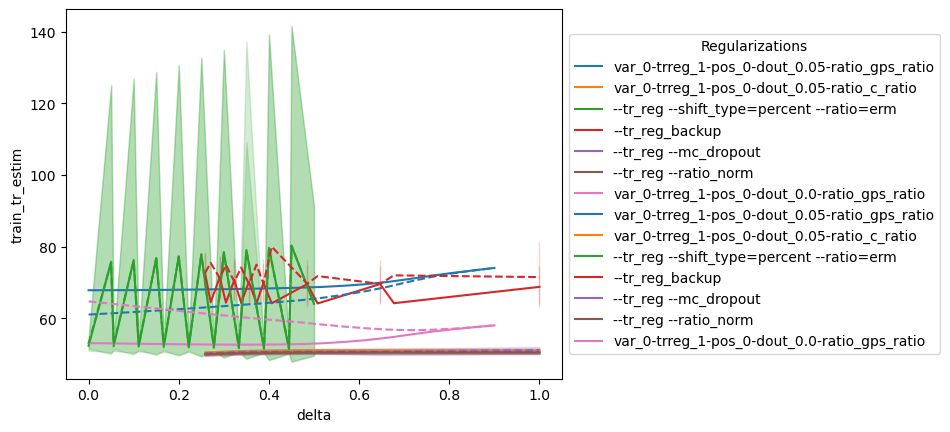

========== medicare-test =========
(222, 11)


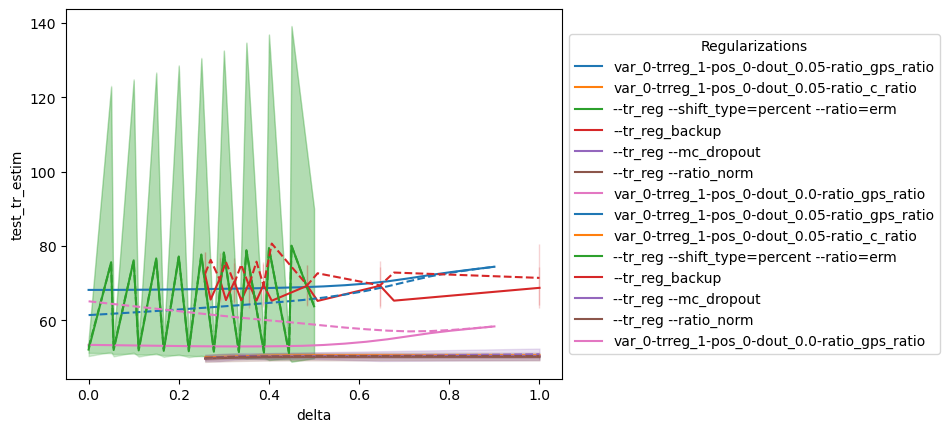

In [7]:

for part in ("train", "test"):
    for dset in datasets:
        print(f"========== {dset}-{part} =========")
        D = curves[(curves.dataset == dset) & (curves.part == part)].drop_duplicates(["delta", "dir", "seed"])
        D = D.fillna(0)
        # truth = D[D.dir == D.dir.iloc[0]][["delta", f"{part}_truth"]]
        # print(D.shape)
        sns.lineplot(x="delta", y=f"{part}_tr_estim", hue="dir", data=D, legend=True)
        sns.lineplot(x="delta", y=f"{part}_aipw_estim", hue="dir", data=D, legend=True, ls="--")
        # sns.lineplot(x="delta", y=f"{part}_truth", label="Ground Truth", c="black", ls=":", data=D, legend=True)
        plt.legend(title='Regularizations', loc='center left', bbox_to_anchor=(1, 0.5))
    
        plt.show()